# 1. házi feladat

Az első házi feladat során egy egyszerű Multi-layer Perceptron (MLP) típusú neuronhálót kell betanítani és kiértékelni egy regressziós és egy klasszifikációs feladaton a PyTorch könyvtár segítségével.

A házi feladat több részfeladatból áll (A - I), melyek egymásra épülnek. A feladat automatikus tesztelőszkripttel rendelkezik és vizsgálja az egyes részfeladatokra adott megoldások helyességét. Éppen ezért, **ne változtasd meg a notebook struktúráját**, ne szedd több részre, illetve ne módosítsd a megírt részeket, csak a megoldásaidat írd be a megfelelő helyre, különben nem fogjuk tudni értékelni! A megoldások az `# Implement your solution BELOW` és `# Implement your solution ABOVE` sorok közé írandók. Ha a megoldott részfeladatok futtatásakor a "Tester: .... OK" felirat megjelenik, _vélhetően_ jó a megoldás. Azonban, a tesztelőszkript nem képes a megoldás helyességét minden aspektus szerint ellenőrizni. Így elképzelhető, hogy beadás után további javításokat kérünk a megoldásban. A beadott házi feladatok gépi tanulás alapú plágiumellenőrzésen esnek át. Másolás gyanújának felmerülése esetén mind a másolat(ok), mind az azt/azokat ihlető eredeti megoldások visszautasíthatók.

**!!! A feladatok megoldását, vagy az arra mutató linkeket bárhol közzétenni tilos !!!**

Elakadás esetén javasolt átnézni a Canvason megosztott segédanyag notebookokat és az előadások anyagát. A Canvas fórumon "HF1 GYIK" névvel, a gyakori kérdéseket és válaszokat gyűjtjük össze. Továbbá, kérhető segítség az oktatóktól is, például a Teams rendszeren keresztül. Ehhez, kérjük a kurzus Canvas oldalán a legfelső modulban található _"
Teams beszélgetés indítása az oktatókkal"_ linket használni: ez egy Teams beszélgetést kezdeményez az összes oktatóval egyidejűleg.

**Megoldás és beküldés menete:**

A közzétett, feladatokat tartalmazó Jupyter notebook a Google Drive-on keresztül lett megosztva, így a Google saját Jupyter notebook szerkesztője és futtatókörnyezete nyílik meg a linkre kattintáskor, a Google Colab. Ennek segítségével online szerkeszthető és futtatható a megosztott notebook. Mivel a notebook csak "view" jogosultságokkal van megosztva, a Google Colab az úgynevezett "Playground" módban nyitja azt meg, ahol bár szerkeszthető és futtatható a notebook, de a változtatások nem lesznek automatikusan mentve. A notebook maradandó hatásokkal járó szerkesztése az alábbi módokon lehetséges:
- Ha online szeretnénk a notebookot szerkeszteni és futtatni a Google Colab segítségével, akkor le kell másolni azt a saját Drive tárhelyre (Google Colab file menü -> Save a copy to Drive), majd a másolatot kell megnyitni szerkesztésre.
- A notebook le is tölthető és saját számítógépen is szerkeszthető / futtatható. Ehhez Python környezet megléte szükséges, valamint a notebookban importált Python csomagok és a `jupyterlab`, vagy `notebook` (https://jupyter.org/install) csomag telepítése szükséges a Python disztribúciónk csomagkezelőjével (`pip`, `conda`, stb.).

A kész megoldást tartalmazó notebookot (.ipynb) fájlként kell feltölteni a Canvas-ban, a házi feladat beadási felületén.
**Kérjük a notebook szerkezetét nem módosítani és nem szétszedni külön feladatok szerint!**

**Határidő:** 2023. március 30., szombat, 23:59.

**Késve legkésőbb leadható:** 2023. április 5., péntek, 23:59. - **Ezt követően pótlásra és/vagy javításra nincs lehetőség, ezáltal jegyszerzésre sem. !!!**

**Értékelés:** A házi feladat helyes megoldása és oktatók által történő elfogadása feltétele a jegyszerzésnek. A házi feladat minősége részletesen pontozásra nem kerül, az értékelése kétfokozatú: megfelelt / nem felelt meg. Az első határidőig leadott nagyrészt helyes és nagyrészt teljes ("megfelelt") megoldásért 10 pont jár. Késés esetén ez elveszik.

**Kikötés:** Ahol csak lehet, hatékony, vektorizált megoldásokat várunk. További részletekért lásd: Canvas, HF1 GYIK fórum, "Használhatók-e Python ciklusok?" bejegyzés.

Tesztelő szkript letöltése, importok.

In [131]:
# Download tester
!rm annbsc24_p1_hw1_tester.py
!wget https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc24_p1/files/annbsc24_p1_hw1_tester.py

import copy
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

from annbsc24_p1_hw1_tester import Tester

--2024-03-30 16:18:29--  https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc24_p1/files/annbsc24_p1_hw1_tester.py
Resolving nipg12.inf.elte.hu (nipg12.inf.elte.hu)... 157.181.160.172
Connecting to nipg12.inf.elte.hu (nipg12.inf.elte.hu)|157.181.160.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14778 (14K)
Saving to: ‘annbsc24_p1_hw1_tester.py’

annbsc24_p1_hw1_tes 100%[===================>]  14.43K  93.1KB/s    in 0.2s    

2024-03-30 16:18:30 (93.1 KB/s) - ‘annbsc24_p1_hw1_tester.py’ saved [14778/14778]



###**A**: Az adatbázis betöltése

**Információ az adatbázisról**:
Az adatbázis az UCI Machine Learning Repository-ról származik (http://archive.ics.uci.edu/ml/datasets/Student+Performance). Két portugál középiskolában tanuló diákok néhány adatát és a harmadév végi, év végi jegyeiket (0-20) tartalmazza. A házi feladat keretében, **neuronhálókkal próbálunk a diákok szociális és pénzügyi háttere alapján becsléseket adni az iskolai teljesítményükre.**

A tesztelőszkript letölti a szöveges formában tárolt adatbázist és elhelyezi a `content` sztringben. Alább, kiírjuk a hosszát és az első 500 karaktert is a sztringből. Az adatbázis fájlok egy-egy sora adja meg az egy-egy mintaelemhez tartozó változók értékeit. A sorokban az egyes változókhoz tartozó értékek pontosvesszővel vannak elválasztva. Az adatbázis első sora a változók neveit tartalmazza.

A feladatod, hogy **alakítsd át a `content` sztringet az adatbázis változóinak értékeit tartalmazó NumPy tömbbé.** A tömbök adattípusa np.float32 (lebegőpontos) legyen! A változók értékeit helyezd el a `dataset_noisy` (n_mintaelem, n_változó) alakú tömbben!  Az input változókat és címkéket később választjuk majd szét.

Az adatbázis helyenként hiányzó értékeket tartalmaz: az adatok egy része nem volt elérhető az adatbázis rögzítésekor. Konkrétabban, a család méretét, a szülők együttélését és munkáját leíró oszlopokban találhatók hiányzó értékek. Ezek az ötödik (famsize), hatodik (Pstatus), kilencedik (Mjob) és tizedik (Fjob) oszlopokban találhatók. Hiányzó értékek esetén a `content` sztringben ténylegesen is hiányoznak a megfelelő pontosvesszők közt elhelyezkedő értékek, tehát ilyenkor két (vagy több) pontosvessző következik egymás után.

A hiányzó értékeket kezelned kell és fel kell ismerned beolvasás közben: a hiányzó értékek helyére a `dataset_noisy` tömbben `np.nan` (Not-a-Number) értékek kell, hogy kerüljenek. A NaN értékek kezeléséről rövid útmutató található a Canvas-on, a HF1 GYIK fórum válaszai közt.

In [132]:
tester = Tester()
content = tester.get_dataset_content()

print("Number of characters in dataset:", len(content))
print(content[:500])


Number of characters in dataset: 27388
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0;0;18;0;1;1;4;4;5;0;4;0;2;2;0;0;1;1;1;0;0;1;1;4;3;4;1;1;3;6;5;6;6
0;0;17;0;1;0;1;1;5;3;4;1;1;2;0;1;0;1;1;1;0;0;1;5;3;3;1;1;3;4;5;5;6
0;0;15;0;0;0;1;1;5;3;3;0;1;2;3;0;1;0;1;0;0;0;1;4;3;2;2;3;3;10;7;8;10
0;0;15;0;1;0;4;2;;4;0;0;1;3;0;1;0;0;0;0;0;0;0;3;2;2;1;1;5;2;15;14;15



In [133]:
# implement your solution BELOW

lines = content.split('\n')
column_names = lines[0].split(';')
lines = lines[1:]

# Meg kell számolni mennyi nem üres sor van
xCount = 0
for line in lines:
    if line.strip() != '':
        xCount += 1

yCount = len(column_names)

# Mindegyik helyre elöszőr NaN értéket teszek
dataset_noisy = np.empty((xCount, yCount), dtype=np.float32)
dataset_noisy[:] = np.nan

sample_index = 0  # Minta index inicializálása
for line in lines:
    if line.strip() != '':  # Ha a sor nem üres
        values = line.split(';')

        for j in range(len(values)):
            value = values[j]
            if value.strip() == '':
                # Ha üres az érték akkor NaN értéket teszek bele
                dataset_noisy[sample_index, j] = np.nan
            else:
                dataset_noisy[sample_index, j] = np.float32(value)
        sample_index += 1

# print(dataset_noisy[3][8])


# implement your solution ABOVE

tester.test('dataset_load', dataset_noisy)



Tester: Dataset loading OK


## **B**: A hiányzó adat kezelése

NaN értékekkel nem fogunk tudni tovább dolgozni, hiszen a legtöbb NumPy/PyTorch művelet nem támogatja őket és bármilyen tömbre, melyben legalább egy NaN érték található, ezen műveletek kimenete is NaN lesz, így például a neuronhálónk becslése és költsége is. Utóbbi megakadályozza, hogy a hálót gradiens módszerrel optimalizáljuk. Éppen ezért, a hiányzó adatokat reprezentáló NaN értékeket az alábbi módon fogjuk eltüntetni:

**Hozz létre minden NaN értéket tartalmazó változóhoz egy-egy újabb változót, melyek azt jelzik, hogy valódi érték található-e az adott változóban az adott mintaelemnél, vagy nem!** Valódi érték esetén az új változó kapjon 1 értéket, NaN esetén pedig 0 értéket! Helyezd el az eredeti adatot és az új változókat a `dataset` tömbben: az új változók oszlopai kerüljenek megfelelő sorrendben az összes eredeti változót tartalmazó oszlop **után**! Az előző feladat leírásában említésre került, hogy melyik oszlopok tartalmazhatnak NaN értékeket.</br>
Mivel a 33 változós adatbázisunk #4, #5, #8 és #9 indexű oszlopai (változói) tartalmazhatnak NaN értékeket, akkor az új `dataset` tömbünk 37 változós lesz és a négy új változó az utolsó négy oszlopba kerül. Például tehát, a #33 indexű oszlopban egy adott sorba nullás érték kerül, ha a #4-es oszlopban annál a sornál NaN található, egyébként pedig 1-es érték kerül oda. Hasonlóan készítjük el a #34, #35, #36 indexű oszlopokat az #5, #8 és #9 indexű oszlopok alapján.

Végül, **helyettesítsd** az így elkészült **tömb összes NaN értékét nullával!**


In [134]:
# implement your solution BELOW

dataset = dataset_noisy.astype(np.float32)

nanIndexs = [4, 5, 8, 9]


for index in nanIndexs:
    is_nan_column = (~np.isnan(dataset[:, index])).astype(np.float32)
    dataset = np.column_stack((dataset, is_nan_column))

dataset[np.isnan(dataset)] = 0
# implement your solution ABOVE

tester.test('dataset_fill_missing', dataset)

Tester: Dataset loading OK


## **C**: Tanító-, validációs- és teszthalmaz szétválasztása

**Keverd meg véletlenszerűen a mintaelemeket** a `dataset` tömbben! Ezt általánosságban azért célszerű megtenni, mert az adatbázisban az elemek valamilyen tulajdonságaik alapján rendezve lehetnek. Megkeverés nélkül, a szétválasztott halmazokban jelentősen különbözne a címkék eloszlása.

Ezt követően **válaszd szét a tömböt tanító-, validációs- és teszthalmazra**, 60%, 20%, 20% arányban! A halmazokat tartalmazó három tömböt nevezd el `dataset_split_train`, `dataset_split_val`, `dataset_split_test`-nek, sorrendben!

In [135]:
# implement your solution BELOW

np.random.shuffle(dataset)

tillTrain = int(60 * xCount / 100)
tillValidation = int(tillTrain + (20 * xCount / 100))
tillTest =  int(tillValidation + (20 * xCount / 100))


print(tillTrain)
print(tillValidation)
print(tillTest)

dataset_split_train = dataset[0:tillTrain]
dataset_split_val = dataset[tillTrain:tillValidation]
dataset_split_test = dataset[tillValidation:tillTest]


# implement your solution ABOVE

tester.test('dataset_split', dataset_split_train, dataset_split_val, dataset_split_test)

237
316
395
Tester: Dataset split OK


## **D**: Az adat-iterátorok létrehozása a regressziós feladathoz

A neuronhálók gradiens módszeres betanítását a legtöbbször iterátorokkal valósítjuk meg, melyek bejárják az adatbázisunkat és előállítják a neuronhálók tanításához szükséges input és címke kötegeket. A regressziós feladat során a becsülendő címkeváltozó a diákok év végi jegye lesz (`G3` nevű oszlop az eredeti adatbázis szövegfájlban - ez a 32-es indexű oszlop), míg az input változókat az összes többi attribútum adja, beleértve az újonnan előállított négy változót is.

Ebben a részfeladatban **elő kell állítanod három iterátor objektumot** `dataloader_reg_train`, `dataloader_reg_val`, `dataloader_reg_test` néven, melyek az előző részfeladatban elkészített tanító-, validációs- és teszthalmazokat tartalmazó tömböket járják be. **Az iterátorok minden lépésben két tenzort adnak vissza**, melyek egy-egy kötegnyi input és címke adatot tárolnak el. A visszaadott tenzorok alakja tehát `(batch_size, 36)` és `(batch_size, 1)` lesz. Utóbbi (a címkéket tartalmazó tenzor) a diákok év végi jegyeit fogja tartalmazni, előbbi pedig az adatbázis összes többi változójának értékét a megfelelő mintaelemekre. `batch_size` a mintaelemek számát adja meg, melyeket egyszerre, egy kötegben fog megkapni a neuronhálónk - ennek értéke lehet például 32.

Hangsúlyozandó, hogy az iterátorok a fent említett NumPy tömbökből (`np.ndarray`) nyert mintaelem-kötegeket már `torch.tensor` típusú objektumokként adják vissza (pontosabban, kételemű tuple-öket adnak vissza, melyekben `torch.tensor` objektumok lesznek). A PyTorch-al definiált neuronhálók betanításához már mindenképp PyTorch tenzorok szükségesek. A tenzorok **adattípusa** 4 bájtos lebegőpontos típus (`torch.float32`) legyen!

A **tanító és validációs halmazt felsoroló iterátorok járják be véletlen sorrendben** a hozzájuk tartozó mintaelemeket! A teszt halmazt felsoroló iterátor ne változtasson a `dataset_split_test` tömb sorrendjén!

Az iterátorok implementációja többféleképpen megoldható, de javasolt a `torch.utils.data` modul `Dataset` és `DataLoader` osztályait felhasználni, vagy szükség esetén származtatni őket.

In [136]:
# implement your solution BELOW

class YearEndGradeDataset(Dataset):
    def __init__(self, features, target):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]



train_x_values = np.concatenate((dataset_split_train[:, :32], dataset_split_train[:, 33:]), axis=1)
val_x_values = np.concatenate((dataset_split_val[:, :32], dataset_split_val[:, 33:]), axis=1)
test_x_values = np.concatenate((dataset_split_test[:, :32], dataset_split_test[:, 33:]), axis=1)

train_dataset = YearEndGradeDataset(train_x_values , np.reshape(dataset_split_train[:, 32], (-1, 1)))
val_dataset = YearEndGradeDataset(val_x_values , np.reshape(dataset_split_val[:, 32], (-1, 1)))
test_dataset = YearEndGradeDataset(test_x_values ,np.reshape(dataset_split_test[:, 32], (-1, 1)))

dataloader_reg_train = DataLoader(train_dataset, batch_size=32, shuffle=True)
dataloader_reg_val = DataLoader(val_dataset, batch_size=32, shuffle=True)
dataloader_reg_test = DataLoader(test_dataset, batch_size=32, shuffle=False)





# implement your solution ABOVE

tester.test('reg_iter', dataloader_reg_train, dataloader_reg_val, dataloader_reg_test)

Tester: Dataset iterators for regression task OK


## **E**: A regressziós neuronháló definiálása

**Definiáld a regressziós feladathoz alkalmazandó neuronhálót megvalósító osztályt**, mely az általános `torch.nn.Module` osztály leszármazottja, majd példányosítsd azt és add értékül a `reg_model` nevű változónak a példányt!

A regressziós neuronháló **tartalmazzon 3 teljesen összekötött réteget, sorban 30, 20 és 1 neuronnal és alkalmazza a ReLU aktivációs függvényt a rétegek között!**

Az új osztálynak mindenképpen meg kell valósítania a `forward(self, x)` tagfüggvényt, mely a neuronhálót (hipotézisfüggvényt) az `x` input tenzorra kiértékeli. A `forward` függvény fogja majd az előbb definiált adat-iterátorból érkező input tenzorokat megkapni és előállítani belőle a címkebecsléseket. Az osztály konstruktorában célszerű a neuronhálónk rétegeit inicializálni.

In [137]:
# implement your solution BELOW

class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear_relu_layers = nn.Sequential(
            nn.Linear(input_dim, 30),
            nn.ReLU(),
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )
    def forward(self, x):
      return self.linear_relu_layers(x)

reg_model = RegressionModel(36)


# implement your solution ABOVE

tester.test('reg_model_architecture', reg_model)

Tester: Regression model architecture OK


## **F**: A háló betanítása regressziós feladatra

**Tanítsd be a** `reg_model` **neuronhálót** a tanítóhalmazon a `dataloader_reg_train` iterátor segítségével és alkalmazd a `dataloader_reg_val` iterátort a validációhoz! Az iterátorok egyetlen (akár véletlen sorrendben történő) végighaladása a tanító és validációs adathalmazokon határoz meg egy _epoch_-ot.

Alkalmazd a regressziókor szokásosan használt **"átlagos négyzetes eltérés" költséget**! **Mérd le minden epoch-ban a tanító- és a validációs halmazon mért költségeket, majd a tanítás végeztével rajzold ki ezeknek az értékeknek a tanítás során való alakulását egy közös grafikonon!** A grafikonok kirajzolásához használhatod például a `matplotlib` könyvtárat. Figyelj rá, hogy a grafikonon jól látszódjanak a görbék közti eltérések a tanítás végén is! Ha szükséges, beállíthatod ehhez kézzel, hogy az y tengely melyik részét mutassa a grafikon. **A grafikonon legyen jelmagyarázat** (legend), mely megmutatja, melyik görbe írja le a tanítási költséget és melyik a validációs költséget!

Azt, hogy a tanítás meddig tartson (az epoch-ok számát) megadhatod kézzel is, a validációs költség alakulása alapján: próbáld úgy megadni, hogy a neuronháló lehetőleg jól betanult legyen, de súlyos túltanulás még ne jelenjen meg!

A betanításhoz válassz egy gradiens módszer alapú **optimalizációs algoritmust** a `torch.optim` modulból (pl. `SGD`, `Adam`, `RMSprop`, stb.), majd válassz egy megfelelő **tanulási rátát** is!

A betanítás végeztével **mérd le az átlagos költséget a teljes teszthalmazon** és add értékül a kapott számot a `test_mse` változónak!

Ezt követően, **válassz néhány mintaelemet a teszthalmazból** (például a `dataloader_reg_test` iterátor segítségével) és **adj becslést a címkéjükre** az input változók értékei alapján, majd **írasd ki az egyes mintaelemekre a becsült és az igazi címkéjüket!** Így példákon is láthatjuk, hogy mennyire ad jó becsléseket a neuronhálónk.



Tranining 1/120 done, training loss: 129.56436157226562, validation loss: 113.84394073486328
Tranining 2/120 done, training loss: 120.58494567871094, validation loss: 105.24016571044922
Tranining 3/120 done, training loss: 111.6740493774414, validation loss: 100.21553802490234
Tranining 4/120 done, training loss: 98.8455810546875, validation loss: 86.9431381225586
Tranining 5/120 done, training loss: 82.33300018310547, validation loss: 68.16695404052734
Tranining 6/120 done, training loss: 57.807647705078125, validation loss: 44.03156661987305
Tranining 7/120 done, training loss: 35.35253143310547, validation loss: 29.181671142578125
Tranining 8/120 done, training loss: 21.707992553710938, validation loss: 21.419204711914062
Tranining 9/120 done, training loss: 16.1951961517334, validation loss: 20.30188751220703
Tranining 10/120 done, training loss: 15.974560737609863, validation loss: 19.050275802612305
Tranining 11/120 done, training loss: 16.40178871154785, validation loss: 20.6093

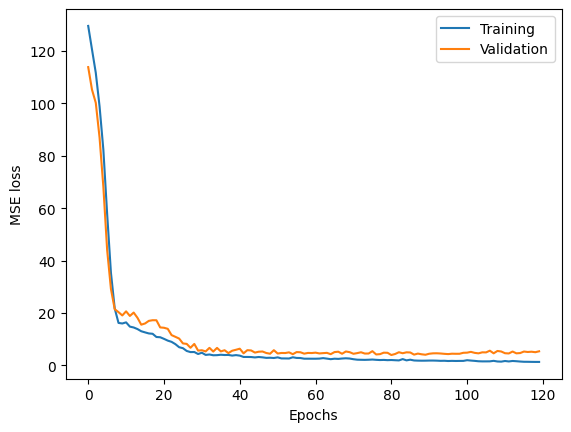

Tester: Regression model learning OK


In [138]:
# implement your solution BELOW

n_epochs = 120
loss_fn = nn.MSELoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(reg_model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for epoch in range(n_epochs):
    reg_model.train()
    train_epoch_losses = []

    for x, y in dataloader_reg_train:
        optimizer.zero_grad()
        y_hat = reg_model(x)
        loss = loss_fn(y_hat, y)
        train_epoch_losses.append(loss)
        loss.backward()
        optimizer.step()

    train_epoch_losses = torch.tensor(train_epoch_losses)
    avg_epoch_loss = train_epoch_losses.mean()
    train_losses.append(avg_epoch_loss)

    reg_model.eval()
    val_epoch_losses = []

    for x, y in dataloader_reg_val:
        with torch.no_grad():
            y_hat = reg_model(x)

        loss = loss_fn(y_hat, y)
        val_epoch_losses.append(loss)

    val_epoch_losses = torch.tensor(val_epoch_losses)
    avg_epoch_loss = val_epoch_losses.mean()
    val_losses.append(avg_epoch_loss)

    test_losses = []
    prediction_label_pairs = []
    for x, y in dataloader_reg_test:
        with torch.no_grad():
          y_hat = reg_model(x)
        loss = loss_fn(y_hat, y)
        prediction_label_pairs.append(torch.concat((y_hat, y), dim=-1))
        test_losses.append(loss)

    test_mse = torch.tensor(test_losses).mean()



    print(f'Tranining {epoch+1}/{n_epochs} done, training loss: {train_losses[-1]}, validation loss: {val_losses[-1]}')


print(test_mse)

plt.plot(train_losses, label='Training')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSE loss')
plt.legend()
plt.show()


# implement your solution ABOVE

tester.test('reg_model_learning', test_mse)

## **G**: Az adat-iterátorok létrehozása a klasszifikációs feladathoz

Hasonlóan a D) feladathoz, itt is három adat-iterátort kell létrehoznunk, azonban ezúttal egy kissé eltérő feladatot fogunk megtanulni megoldani, így a visszaadott tenzorok alakja / adattípusa is eltérő lesz. **Állítsd elő** a `dataloader_cl_train`, `dataloader_cl_val`, `dataloader_cl_test` nevű **iterátorokat**, melyek ugyancsak a C) részfeladatban elkészült tanító-, validációs- és teszthalmazokat tartalmazó tömböket járják be! A klasszifikációs feladatban input változókként az összes változót felhasználjuk az adatbázisban, kivéve a három harmadév végi jegyét a diákoknak (`G1`, `G2`, `G3` nevű, #30, #31 és #32 indexű oszlopok az eredeti adatbázis szövegfájlban). Címkeként három kategóriát definiálunk és az összes diákot besoroljuk ezekbe a kategóriákba:
- **"Gyengén teljesítő diákok"** kategória, #0 kategóriaindex: azon diákok kerülnek ide, akik átlagos jegye kisebb, mint 9.5.
- **"Közepesen teljesítő diákok"** kategória, #1 kategóriaindex: azon diákok kerülnek ide, akik legnagyobb jegye kisebb, mint 14, de nem tartoznak a "Gyengén teljesítő diákok" közé.
- **"Jól teljesítő diákok"** kategória, #2 kategóriaindex: azon diákok kerülnek ide, akik nem tartoznak a másik két kategóriába.

A fentiek alapján az iterátorok által visszaadott tenzorok alakja `(batch_size, 34)` és `(batch_size, 1)` lesz. Utóbbi (a címkéket tartalmazó tenzor) a diákok kategóriaindexét fogja tartalmazni (azaz 0, 1, vagy 2 értékeket, `torch.int64` adattípusban), előbbi pedig az adatbázis összes felhasznált változójának értékét a megfelelő mintaelemekre `torch.float32` adattípusban. `batch_size` ezúttal is a mintaelemek számát adja meg, ez kézzel beállítandó.

A **tanító és validációs halmazt felsoroló iterátorok véletlen sorrendben járják be** a hozzájuk tartozó mintaelemeket! A teszt halmazt felsoroló iterátor ne változtasson a `dataset_split_test` tömb sorrendjén!

In [139]:
# implement your solution BELOW


class YearEndGradeDatasetClass(Dataset):
    def __init__(self, features, target):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.int64)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]

train_x_values = np.concatenate((dataset_split_train[:, :30], dataset_split_train[:, 33:]), axis=1)
val_x_values = np.concatenate((dataset_split_val[:, :30], dataset_split_val[:, 33:]), axis=1)
test_x_values = np.concatenate((dataset_split_test[:, :30], dataset_split_test[:, 33:]), axis=1)


train_y_values = np.full(len(dataset_split_train[:, 30:33]), dtype=np.int64, fill_value=2)
val_y_values = np.full(len(dataset_split_val[:, 30:33]), dtype=np.int64, fill_value=2)
test_y_values = np.full(len(dataset_split_test[:, 30:33]), dtype=np.int64, fill_value=2)


matrixes = [dataset_split_train[:, 30:33], dataset_split_val[:, 30:33], dataset_split_test[:, 30:33]]

categories = []
for matrix in matrixes:
    cat = np.full(len(matrix), 2, dtype=np.int64)
    cat[matrix.mean(axis=1) < 9.5] = 0
    cat[(matrix.mean(axis=1) > 9.5) & (matrix.max(axis=1) < 14)] = 1
    categories.append(cat)


train_dataset = YearEndGradeDatasetClass(train_x_values , categories[0])
val_dataset = YearEndGradeDatasetClass(val_x_values , categories[1])
test_dataset = YearEndGradeDatasetClass(test_x_values ,categories[2])

dataloader_cl_train = DataLoader(train_dataset, batch_size=32, shuffle=True)
dataloader_cl_val = DataLoader(val_dataset, batch_size=32, shuffle=True)
dataloader_cl_test = DataLoader(test_dataset, batch_size=32, shuffle=False)


# implement your solution ABOVE

tester.test('cl_iter', dataloader_cl_train, dataloader_cl_val, dataloader_cl_test)

Tester: Dataset iterators for classification task OK


## **H**: A klasszifikációs neuronháló definiálása

**Definiáld a klasszifikációs feladathoz alkalmazandó neuronhálót megvalósító osztályt**, mely a regressziós neuronhálót implementáló osztályhoz hasonlóan, az általános `torch.nn.Module` osztály leszármazottja! Példányosítsd az új osztályt és add értékül a `cl_model` nevű változónak a példányt!

A klasszifikációs neuronháló **tartalmazzon 3 teljesen összekötött réteget! Az első kettő réteg tartalmazzon egyenként 30 és 20 neuront és alkalmazza a ReLU aktivációs függvényt a rétegek után!** Az utolsó réteget a háromkategóriás klasszifikációnak megfelelően kell kialakítani! Lásd a "HF1 GYIK" fórumot!

In [140]:
# implement your solution BELOW
class ClassificationModel(nn.Module):
    def __init__(self, input_dim):
      super().__init__()
      self.linear_relu_layers = nn.Sequential(
          nn.Linear(input_dim, 30),
          nn.ReLU(),
          nn.Linear(30, 20),
          nn.ReLU(),
          nn.Linear(20, 3)
      )


    def forward(self, x):
      return self.linear_relu_layers(x)


cl_model = ClassificationModel(34)


# implement your solution ABOVE

tester.test('cl_model_architecture', cl_model)

Tester: Classification model architecture OK


## **I**: A háló betanítása (multi-class) klasszifikációs feladatra

**Tanítsd be a** `cl_model` **neuronhálót** a tanítóhalmazon a `dataloader_cl_train` iterátor segítségével és alkalmazd a `dataloader_cl_val` iterátort a validációhoz!

Alkalmazd a multi-class klasszifikációkor szokásosan használt **cross-entropy költséget**! **Mérd le minden epoch-ban a tanító- és a validációs halmazon mért költségeket, majd a tanítás végeztével rajzold ki ezeknek az értékeknek a tanítás során való alakulását egy közös grafikonon!** A grafikonon a jelmagyarázat meglétére és a görbék könnyű elkülöníthetőségére figyelj ezúttal is!

A tanítást ezúttal az **early stopping** technika állítsa le! Amennyiben adott számú epoch-on keresztül (`patience`) nem javul a validációs költség, érjen véget a betanítás és **állítsuk vissza a `cl_model` súlyait abból az epoch-ból, amikor a legjobb volt a validációs költség!** Mindez automatikusan történjen!

A betanítás végeztével **mérd le az átlagos költséget a teljes teszthalmazon** és add értékül a kapott számot a `test_ce` változónak!

**Számold ki az _accuracy_ (pontosság) metrikát is a teszthalmaz elemein** és add értékül a kapott számot a `test_acc` változónak! Az _accuracy_ metrika a helyesen klasszifikált mintaelemek arányát adja meg. Például, ha 150 mintaelem kategóriájának becslésekor 75 esetben találtuk el a helyes kategóriát, az _accuracy_ értéke 0.5 lesz.

Ezt követően, **válassz néhány mintaelemet a teszthalmazból** (például a `dataloader_cl_test` iterátor segítségével) és **adj becslést a címkéjükre** (a kategória indexére) az input változók értékei alapján, majd **írasd ki az egyes mintaelemekre a becsült és az igazi címkéjüket** (a kategóriák indexét)! Így példákon is láthatjuk, hogy mennyire ad jó becsléseket a neuronhálónk.

Végezetül, **számold ki a háló teszthalmazon vett konfúziós mátrixát és rajzold ki azt**! A konfúziós mátrix egy k x k méretű mátrix k kategória esetén, ahol az `[i,j]` indexű elem megadja, hogy az adathalmazon a modellünk hány `i` kategóriába tartozó mintaelemet becsült a `j` kategóriába. A modellünk jó teljesítményét jelzi, ha minél több elem kerül a konfúziós mátrix főátlójába. A számoláshoz felhasználhatsz külső könyvtárat is, de NumPy-ban is megoldható. A kirajzoláshoz használható például a `matplotlib.pyplot` csomag `imshow` függvénye. Figyelj rá, hogy a grafikonon világosan látszon, hogy melyik tengely sorolja fel az igazi kategóriákat és melyik a becsült kategóriákat, látszanak a sorok és oszlopok végén a kategóriák indexei és a cellákban az odatartozó mintaelemek darabszáma!


Tranining 1/100 done, training loss: 1.1090967655181885, validation loss: 1.0523282289505005
Tranining 2/100 done, training loss: 1.0875790119171143, validation loss: 1.0812873840332031
Tranining 3/100 done, training loss: 1.0830992460250854, validation loss: 1.0765104293823242
Tranining 4/100 done, training loss: 1.0779485702514648, validation loss: 1.0814019441604614
Tranining 5/100 done, training loss: 1.0695278644561768, validation loss: 1.0675297975540161
Tranining 6/100 done, training loss: 1.0727180242538452, validation loss: 1.0532809495925903
Tranining 7/100 done, training loss: 1.0656211376190186, validation loss: 1.0643649101257324
Tranining 8/100 done, training loss: 1.0580941438674927, validation loss: 1.0622018575668335
Tranining 9/100 done, training loss: 1.0523604154586792, validation loss: 1.0607737302780151
Tranining 10/100 done, training loss: 1.047694444656372, validation loss: 1.0329705476760864
Tranining 11/100 done, training loss: 1.0397599935531616, validation l

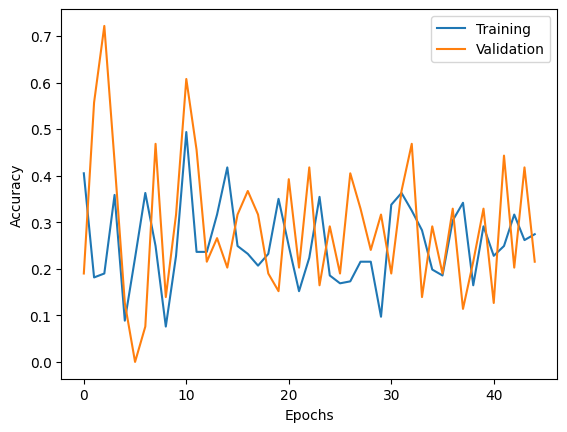

{'test_loss': tensor(1.1358), 'test_Accuracy': array([0.24050634])}
torch.Size([79, 2])


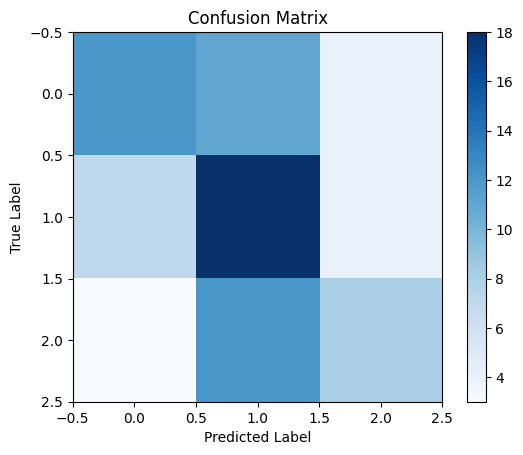

Tester: Classification model learning OK


In [141]:
# implement your solution BELOW

class Callback():
  def __init__(self):
    pass

  def on_train_end(self, avg_train_loss):
    pass

  def on_val_end(self, avg_val_loss):
    pass

  def on_test_end(self, avg_test_loss):
    pass

  def on_epoch_end(self, trainer):
    pass

  def on_train_prediction(self, prediction, label):
    pass

  def on_val_prediction(self, prediction, label):
    pass

  def on_test_prediction(self, prediction, label):
    pass

  def on_stop(self, results):
    pass

class EarlyStoppingCallback(Callback):
  def __init__(self, delta=0.01, patience=10, save_path=None, model=None):
    self.delta = delta
    self.patience = patience
    self.best_loss = np.inf
    self.no_improvement_count = 0
    self.save_path = save_path
    self.model = model
    self.best_model_state = None

  def on_val_end(self, avg_val_loss):
    if avg_val_loss + self.delta < self.best_loss:
      self.best_loss = avg_val_loss
      self.no_improvement_count = 0
      if self.save_path is not None and self.model is not None:
        self.best_model_state = copy.deepcopy(self.model.state_dict())
        torch.save(self.model.state_dict(), self.save_path)
    else:
      self.no_improvement_count += 1

  def on_epoch_end(self, trainer):
    if self.no_improvement_count >= self.patience:
      print('Stopped by early stopping.')
      print('Best validation loss: ', self.best_loss.item())
      trainer.stop = True
      if self.best_model_state is not None:
        self.model.load_state_dict(self.best_model_state)


class MetricsCallback(Callback):
  def __init__(self, metrics_to_track):
    self.metrics_to_track = metrics_to_track
    self.__reset()

  def __reset(self):
    self.metrics_temp = dict()
    self.metrics = dict()

  def __add_prediction(self, prediction, label, prefix):
    for metric_name, metric_fn in self.metrics_to_track.items():
      key = f'{prefix}_{metric_name}'
      if key not in self.metrics:
        self.metrics[key] = []
        self.metrics_temp[key] = []

      self.metrics_temp[key].append(metric_fn(prediction, label).reshape(-1))

  def __aggregate_metrics(self, prefix):
    for key in self.metrics_to_track.keys():
      self.metrics[f'{prefix}_{key}'].append(torch.cat(self.metrics_temp[f'{prefix}_{key}']).mean().item())
      self.metrics_temp[f'{prefix}_{key}'] = []

  def on_train_prediction(self, prediction, label):
    self.__add_prediction(prediction, label, 'train')

  def on_val_prediction(self, prediction, label):
    self.__add_prediction(prediction, label, 'val')

  def on_test_prediction(self, prediction, label):
    self.__add_prediction(prediction, label, 'test')

  def on_train_end(self, avg_train_loss):
    self.__aggregate_metrics('train')

  def on_val_end(self, avg_val_loss):
    self.__aggregate_metrics('val')

  def on_test_end(self, avg_test_loss):
    self.__aggregate_metrics('test')

  def on_stop(self, results):
    metrics = {key: np.array(val) for key,val in self.metrics.items()}
    results.update(metrics)
    self.__reset()

class Trainer():
  def __init__(self, model, train_dataloader, val_dataloader, optimizer, loss_fn, n_epochs=10, callbacks=[]):
    self.model = model
    self.train_dataloader = train_dataloader
    self.val_dataloader = val_dataloader
    self.optimizer = optimizer
    self.loss_fn = loss_fn
    self.n_epochs = n_epochs
    self.stop = False
    self.callbacks = callbacks
    self.train_losses = []
    self.val_losses = []

  def __train(self, dataloader):
    self.model.train()
    train_epoch_losses = []

    for x, y in dataloader:
      self.optimizer.zero_grad()
      y_hat = self.model(x)
      loss = self.loss_fn(y_hat, y)
      [callback.on_train_prediction(y_hat.detach(), y) for callback in self.callbacks]
      train_epoch_losses.append(loss)
      loss.backward()
      self.optimizer.step()

    train_epoch_losses = torch.tensor(train_epoch_losses)
    avg_epoch_loss = train_epoch_losses.mean()

    [callback.on_train_end(avg_epoch_loss) for callback in self.callbacks]

    return avg_epoch_loss

  def __eval(self, dataloader, test=False):
    self.model.eval()
    epoch_losses = []

    for x, y in dataloader:
      with torch.no_grad():
        y_hat = self.model(x)

      loss = self.loss_fn(y_hat, y)
      if test:
        [callback.on_test_prediction(y_hat.detach(), y) for callback in self.callbacks]
      else:
        [callback.on_val_prediction(y_hat.detach(), y) for callback in self.callbacks]

      epoch_losses.append(loss)

    epoch_losses = torch.tensor(epoch_losses)
    avg_epoch_loss = epoch_losses.mean()

    if test:
      [callback.on_test_end(avg_epoch_loss) for callback in self.callbacks]
    else:
      [callback.on_val_end(avg_epoch_loss) for callback in self.callbacks]

    return avg_epoch_loss

  def train(self):
    for epoch in range(self.n_epochs):
      train_loss = self.__train(self.train_dataloader)
      self.train_losses.append(train_loss)
      val_loss = self.__eval(self.val_dataloader, test=False)
      self.val_losses.append(val_loss)

      print(f'Tranining {epoch+1}/{self.n_epochs} done, training loss: {train_loss}, validation loss: {val_loss}')

      [callback.on_epoch_end(self) for callback in self.callbacks]

      if self.stop:
        break

    results = {
        'train_loss': self.train_losses,
        'val_loss': self.val_losses
    }

    [callback.on_stop(results) for callback in self.callbacks]

    return results

  def test(self, test_dataloader):
    test_loss = self.__eval(test_dataloader, test=True)

    results = {
        'test_loss': test_loss
    }

    [callback.on_stop(results) for callback in self.callbacks]

    return results



n_epochs = 100
model = ClassificationModel(34)
loss_fn = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def accuracy(pred, label):
  pred = torch.argmax(pred, dim=-1)
  label = torch.argmax(label, dim=-1)

  return (pred == label).to(torch.float32)

metrics = {
    'Accuracy': accuracy
}

earlystopping_callback = EarlyStoppingCallback(delta=0.01, patience=20, save_path='best_model.pth')
metrics_callback = MetricsCallback(metrics)
callbacks = [earlystopping_callback, metrics_callback]
trainer = Trainer(model, dataloader_cl_train , dataloader_cl_val, optimizer, loss_fn, n_epochs=n_epochs, callbacks=callbacks)
results = trainer.train()

plt.plot(results['train_Accuracy'], label='Training')
plt.plot(results['val_Accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


model.eval()
test_losses = []  # Store test losses
accuracy = []
prediction_label_pairs = []
for x, y in dataloader_cl_test:
    with torch.no_grad():
        y_hat = model(x)
    loss = loss_fn(y_hat, y)
    test_losses.append(loss.item())
    prediction = torch.argmax(y_hat, dim=1)
    prediction_label_pairs.append(torch.stack((prediction, y), dim=-1))
    accuracy.append((prediction == y).to(torch.float32))
test_ce = torch.tensor(test_losses).mean()


accuracy = torch.cat(accuracy).mean()
test_acc = accuracy.item()
#print(prediction_label_pairs[0])

print(trainer.test(dataloader_cl_test))

from sklearn.metrics import confusion_matrix

prediction_label_pairs = torch.cat(prediction_label_pairs, 0)
print(prediction_label_pairs.shape)
conf = confusion_matrix(prediction_label_pairs[:,1], prediction_label_pairs[:,0])







plt.imshow(conf, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# implement your solution ABOVE

tester.test('cl_model_learning', test_ce, test_acc)